<a href="https://colab.research.google.com/github/HenryMorganDibie/Machine-Learning-and-Natural-Language-Processing/blob/main/Predictions_of_hourly_energy_consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import xgboost as xgb
from sklearn.metrics import mean_squared_error


In [2]:
# load Hourly energy consumption data
df = pd.read_csv('drive/MyDrive/Predictions of hourly energy consumptionsss/AEP_hourly.csv')
df.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [3]:
# information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB


In [4]:
# Describes the following aspects of the data: Type of the data (integer, float, Python object, etc.)
df.dtypes

Datetime     object
AEP_MW      float64
dtype: object

What is the year with the highest electricity?

In [5]:
# Find the year with the highest electricity value
max_year = df.loc[df['AEP_MW'].idxmax(), 'Datetime']

# Print the year with the highest electricity value
print(f"The year with the highest electricity value is: {max_year}")

The year with the highest electricity value is: 2008-10-20 14:00:00


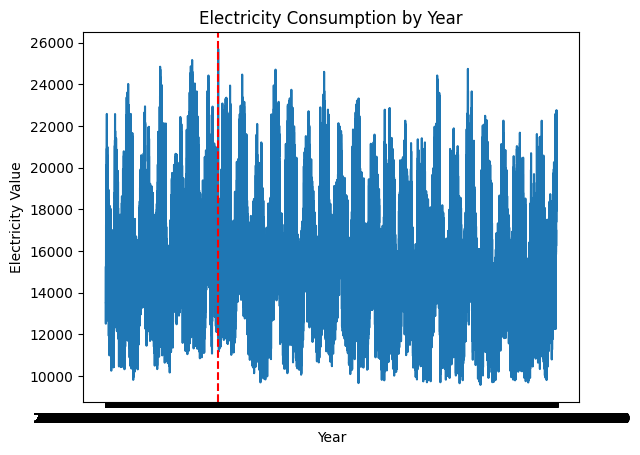

In [6]:
# Create plot
plt.plot(df['Datetime'], df['AEP_MW'])

# Highlight the year with the highest electricity value
plt.axvline(x=max_year, color='r', linestyle='--')

# Set axis labels and title
plt.xlabel('Year')
plt.ylabel('Electricity Value')
plt.title('Electricity Consumption by Year')

# Show plot
plt.show()

In [8]:
df['Datetime']=pd.to_datetime(df['Datetime'])

df.dtypes

Datetime    datetime64[ns]
AEP_MW             float64
dtype: object

In [9]:
# Extract Day, Weekday and Hour
df["Day"] = df["Datetime"].apply(lambda x: x.day)
df["Weekday"] = df["Datetime"].apply(lambda x: x.weekday())
df["Hour"] = df["Datetime"].apply(lambda x: x.hour)
print(df.head())

             Datetime   AEP_MW  Day  Weekday  Hour
0 2004-12-31 01:00:00  13478.0   31        4     1
1 2004-12-31 02:00:00  12865.0   31        4     2
2 2004-12-31 03:00:00  12577.0   31        4     3
3 2004-12-31 04:00:00  12517.0   31        4     4
4 2004-12-31 05:00:00  12670.0   31        4     5


In [10]:
# Finding the correlations in the dataset
df.corr()

,AEP_MW,Day,Weekday,Hour
AEP_MW,1.000000,-0.006847,-0.219467,0.419480
Day,-0.006847,1.000000,-0.001230,-0.000108
Weekday,-0.219467,-0.001230,1.000000,0.000324
Hour,0.419480,-0.000108,0.000324,1.000000


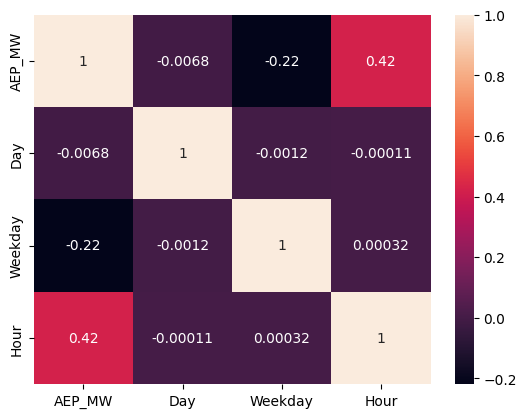

In [11]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [12]:
# description of the data in the DataFrame.
df.describe()

,AEP_MW,Day,Weekday,Hour
count,121273.000000,121273.000000,121273.000000,121273.000000
mean,15499.513717,15.723220,2.999513,11.501587
std,2591.399065,8.802246,1.999816,6.921830
min,9581.000000,1.000000,0.000000,0.000000
25%,13630.000000,8.000000,1.000000,6.000000
50%,15310.000000,16.000000,3.000000,12.000000
75%,17200.000000,23.000000,5.000000,18.000000
max,25695.000000,31.000000,6.000000,23.000000


In [13]:
# Length of data
len(df)

121273

In [14]:
#Checking for missing values
df.isna().sum()

Datetime    0
AEP_MW      0
Day         0
Weekday     0
Hour        0
dtype: int64

In [15]:
#Finding Duplicated value
df.duplicated().sum()

0

In [16]:
# Finding Unique values
df.nunique()

Datetime    121269
AEP_MW       12643
Day             31
Weekday          7
Hour            24
dtype: int64

In [17]:
# description of the data in the DataFrame.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AEP_MW,121273.0,15499.513717,2591.399065,9581.0,13630.0,15310.0,17200.0,25695.0
Day,121273.0,15.723220,8.802246,1.0,8.0,16.0,23.0,31.0
Weekday,121273.0,2.999513,1.999816,0.0,1.0,3.0,5.0,6.0
Hour,121273.0,11.501587,6.921830,0.0,6.0,12.0,18.0,23.0


In [18]:
#Finding numerical columns in dataset
df.select_dtypes(exclude='object').columns

Index(['Datetime', 'AEP_MW', 'Day', 'Weekday', 'Hour'], dtype='object')

In [19]:
df.select_dtypes('number').head()

,AEP_MW,Day,Weekday,Hour
0,13478.0,31,4,1
1,12865.0,31,4,2
2,12577.0,31,4,3
3,12517.0,31,4,4
4,12670.0,31,4,5


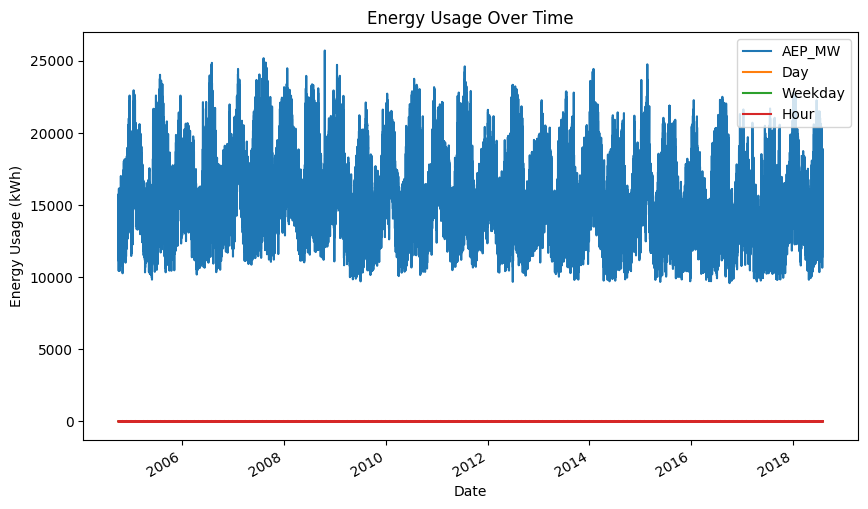

In [22]:
# Convert the date column to a datetime object
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Set the Date column as the index of the DataFrame
df.set_index('Datetime', inplace=True)

# Plot energy usage as a line chart
df.plot(kind='line', figsize=(10, 6))

# Add a title and axis labels
plt.title('Energy Usage Over Time')
plt.xlabel('Date')
plt.ylabel('Energy Usage (kWh)')

# Show the plot
plt.show()

Create Model

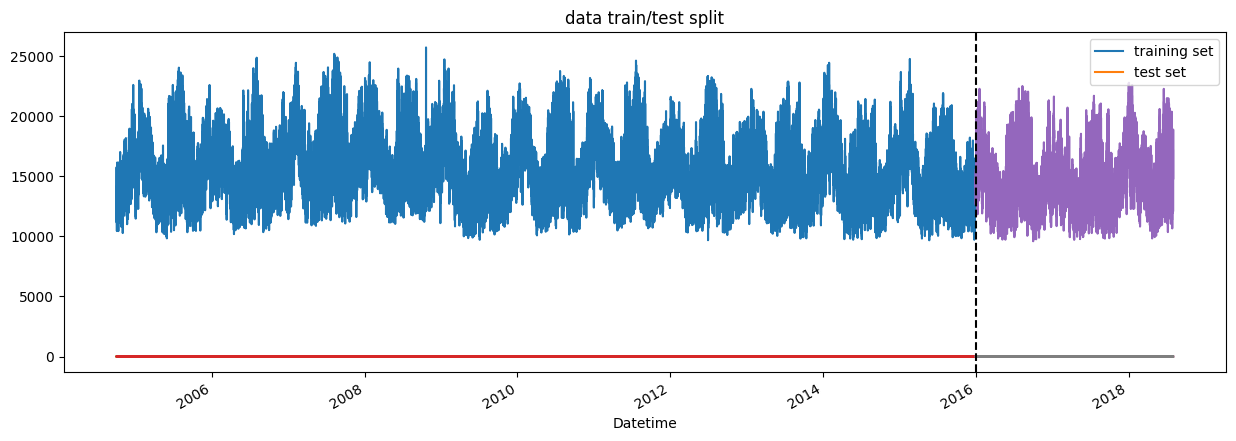

In [23]:
train = df.loc[df.index < '01-01-2016']
test = df.loc[df.index >= '01-01-2016']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='training set', title='data train/test split')
test.plot(ax=ax, label='test set')
ax.axvline('01-01-2016', color='black', ls='--')
ax.legend(['training set', 'test set'])
plt.show()

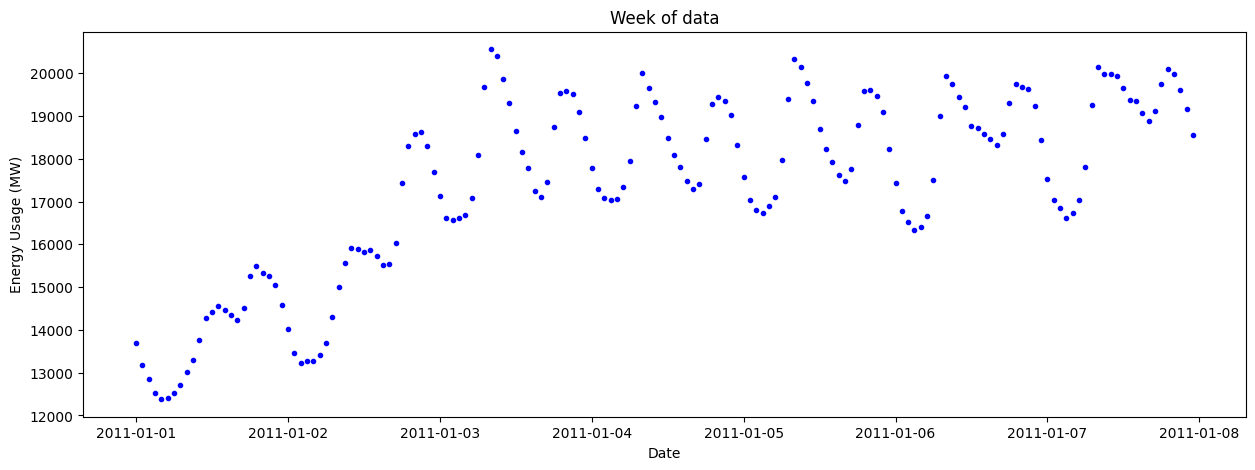

In [24]:
start_date = '01-01-2011'
end_date = '01-08-2011'

# Extract data for the desired date range
mask = (df.index >= start_date) & (df.index < end_date)
data = df.loc[mask,'AEP_MW']

# Create the plot
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(data, '.', color='blue')
ax.set_title('Week of data')
ax.set_xlabel('Date')
ax.set_ylabel('Energy Usage (MW)')
plt.show()

Visualize our features / target relationship

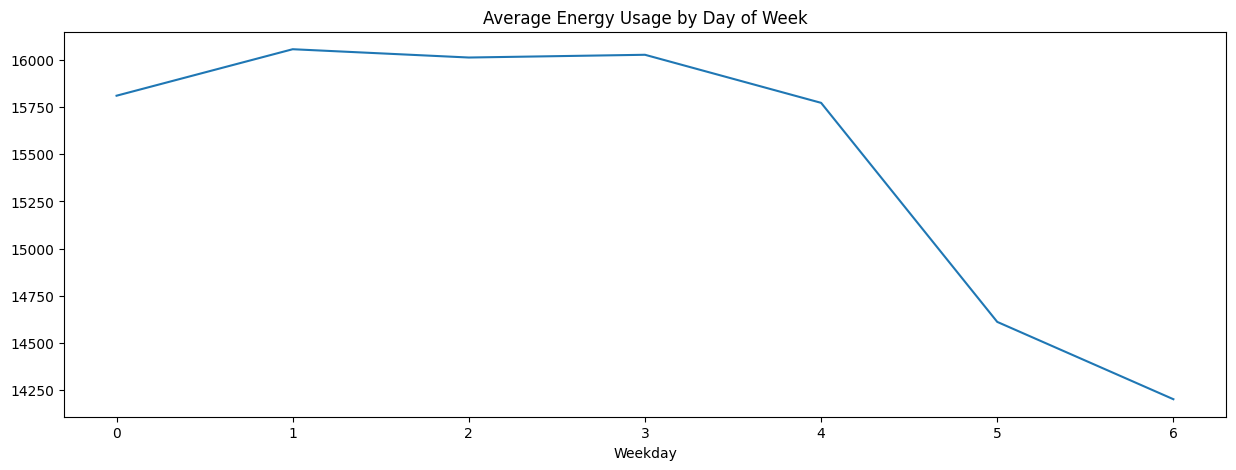

In [25]:
df.groupby('Weekday')['AEP_MW'].mean().plot(kind='line', figsize=(15, 5), title='Average Energy Usage by Day of Week')
plt.show()

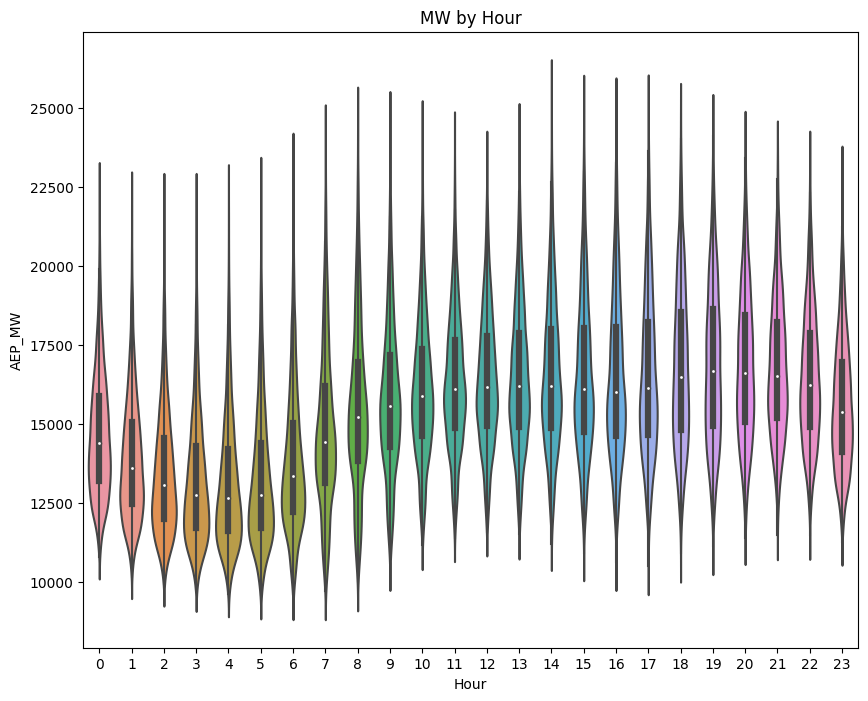

In [26]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.violinplot(data=df, x='Hour', y='AEP_MW')
ax.set_title('MW by Hour')
plt.show()

In [27]:
df.columns

Index(['AEP_MW', 'Day', 'Weekday', 'Hour'], dtype='object')

In [28]:
#Splitting the data into features and target or X and Y
FEATURES = ['Day', 'Weekday', 'Hour']
TARGET = 'AEP_MW'

In [29]:
X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [30]:
reg = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50,
                      learning_rate=0.01)
reg.fit(X_train, y_train, 
       eval_set=[(X_train, y_train), (X_test, y_test)],
       verbose=100)

[0]	validation_0-rmse:15720.39353	validation_1-rmse:14832.61844
[100]	validation_0-rmse:6071.11641	validation_1-rmse:5223.62049
[200]	validation_0-rmse:2942.58588	validation_1-rmse:2346.80289
[300]	validation_0-rmse:2206.34627	validation_1-rmse:2017.70640
[336]	validation_0-rmse:2136.17322	validation_1-rmse:2044.55172


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Feature Importance

In [31]:
import plotly.express as px

# Create a DataFrame with feature importances
fi = pd.DataFrame(data=reg.feature_importances_, index=reg.feature_names_in_, columns=['importance'])

# Sort the DataFrame by importance and plot a horizontal bar chart
fi_sorted = fi.sort_values('importance')
fig = px.bar(fi_sorted, x=fi_sorted['importance'], y=fi_sorted.index, orientation='h', title='Feature Importance')
fig.show()

Forecast on Test

In [32]:
test['prediction'] = reg.predict(X_test)


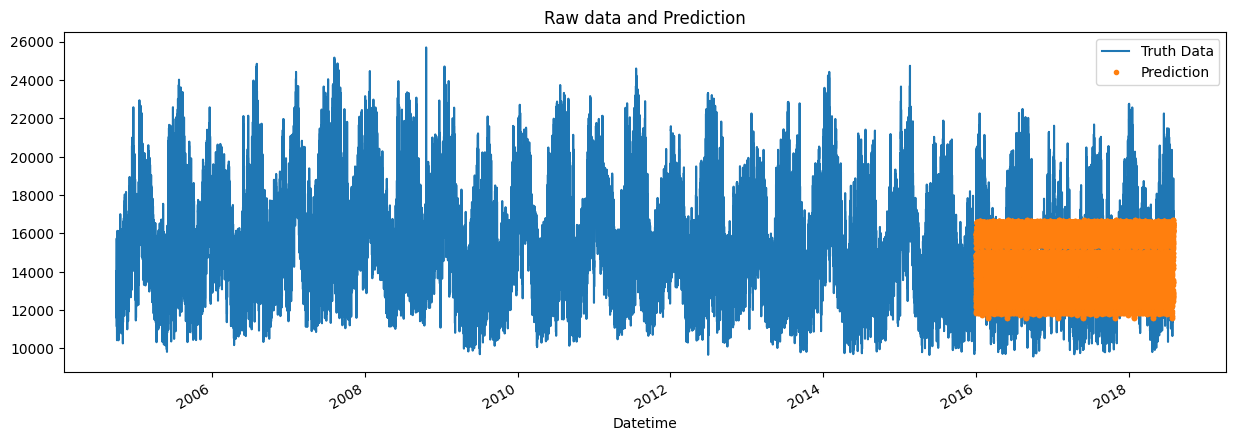

In [33]:
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['AEP_MW']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Prediction'])
ax.set_title('Raw data and Prediction')
plt.show()

In [34]:
# Calculate and plot the RMSE score
score = np.sqrt(mean_squared_error(test['AEP_MW'], test['prediction']))
print(f'RMSE Score on Test set:{score:0.2f}')

RMSE Score on Test set:2014.10
